# **Crop prediction**

Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, is the project to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

## **Data fields:**

**N** - ratio of Nitrogen content in soil

**P** - ratio of Phosphorous content in soil

**K** - ratio of Potassium content in soil

**temperature** - temperature in degree Celsius

**humidity** - relative humidity in %

**ph** - ph value of the soil

**rainfall** - rainfall in mm

## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV   
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Loading the dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Crop_recommendation.csv')


In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.shape

(2200, 8)

In [ ]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

## **To check for NA values**

In [ ]:
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## **Information about the data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## **Crops in dataset**

In [ ]:
crops = data['label'].unique()

print('No. of crops:',len(crops),'\n')
print('The crops present in the dataset are:\n')
print(crops)

No. of crops: 22 

The crops present in the dataset are:

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


# **Count of each crop**

In [ ]:
data['label'].value_counts()

pomegranate    100
muskmelon      100
mothbeans      100
jute           100
blackgram      100
maize          100
cotton         100
kidneybeans    100
banana         100
chickpea       100
coconut        100
grapes         100
pigeonpeas     100
apple          100
lentil         100
papaya         100
watermelon     100
mungbean       100
coffee         100
mango          100
rice           100
orange         100
Name: label, dtype: int64

# **Descriptive analysis**

In [ ]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#**Correlation matrix**

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df = data.copy()
df['label']= label_encoder.fit_transform(df['label'])  
df['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

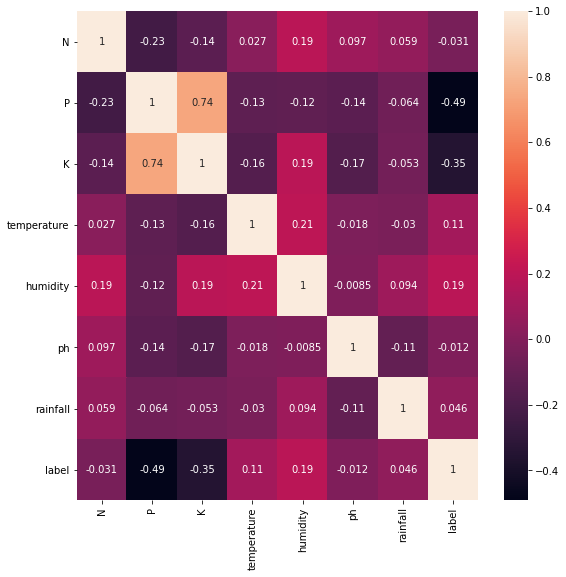

In [ ]:
plt.figure(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True)
plt.show()

# **Strip Plot**

In [ ]:
def plot_stripplot(df, cols):
    plt.figure(figsize=(20, 35))
    plt.suptitle('Independent vs Dependent Features')
    for loc, col in enumerate(cols):
        plt.subplot(4, 2, loc+1)
        sns.stripplot(df[col], df['label'])
        plt.xlabel(f'{col}')
        plt.ylabel('Crops')
    return None

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

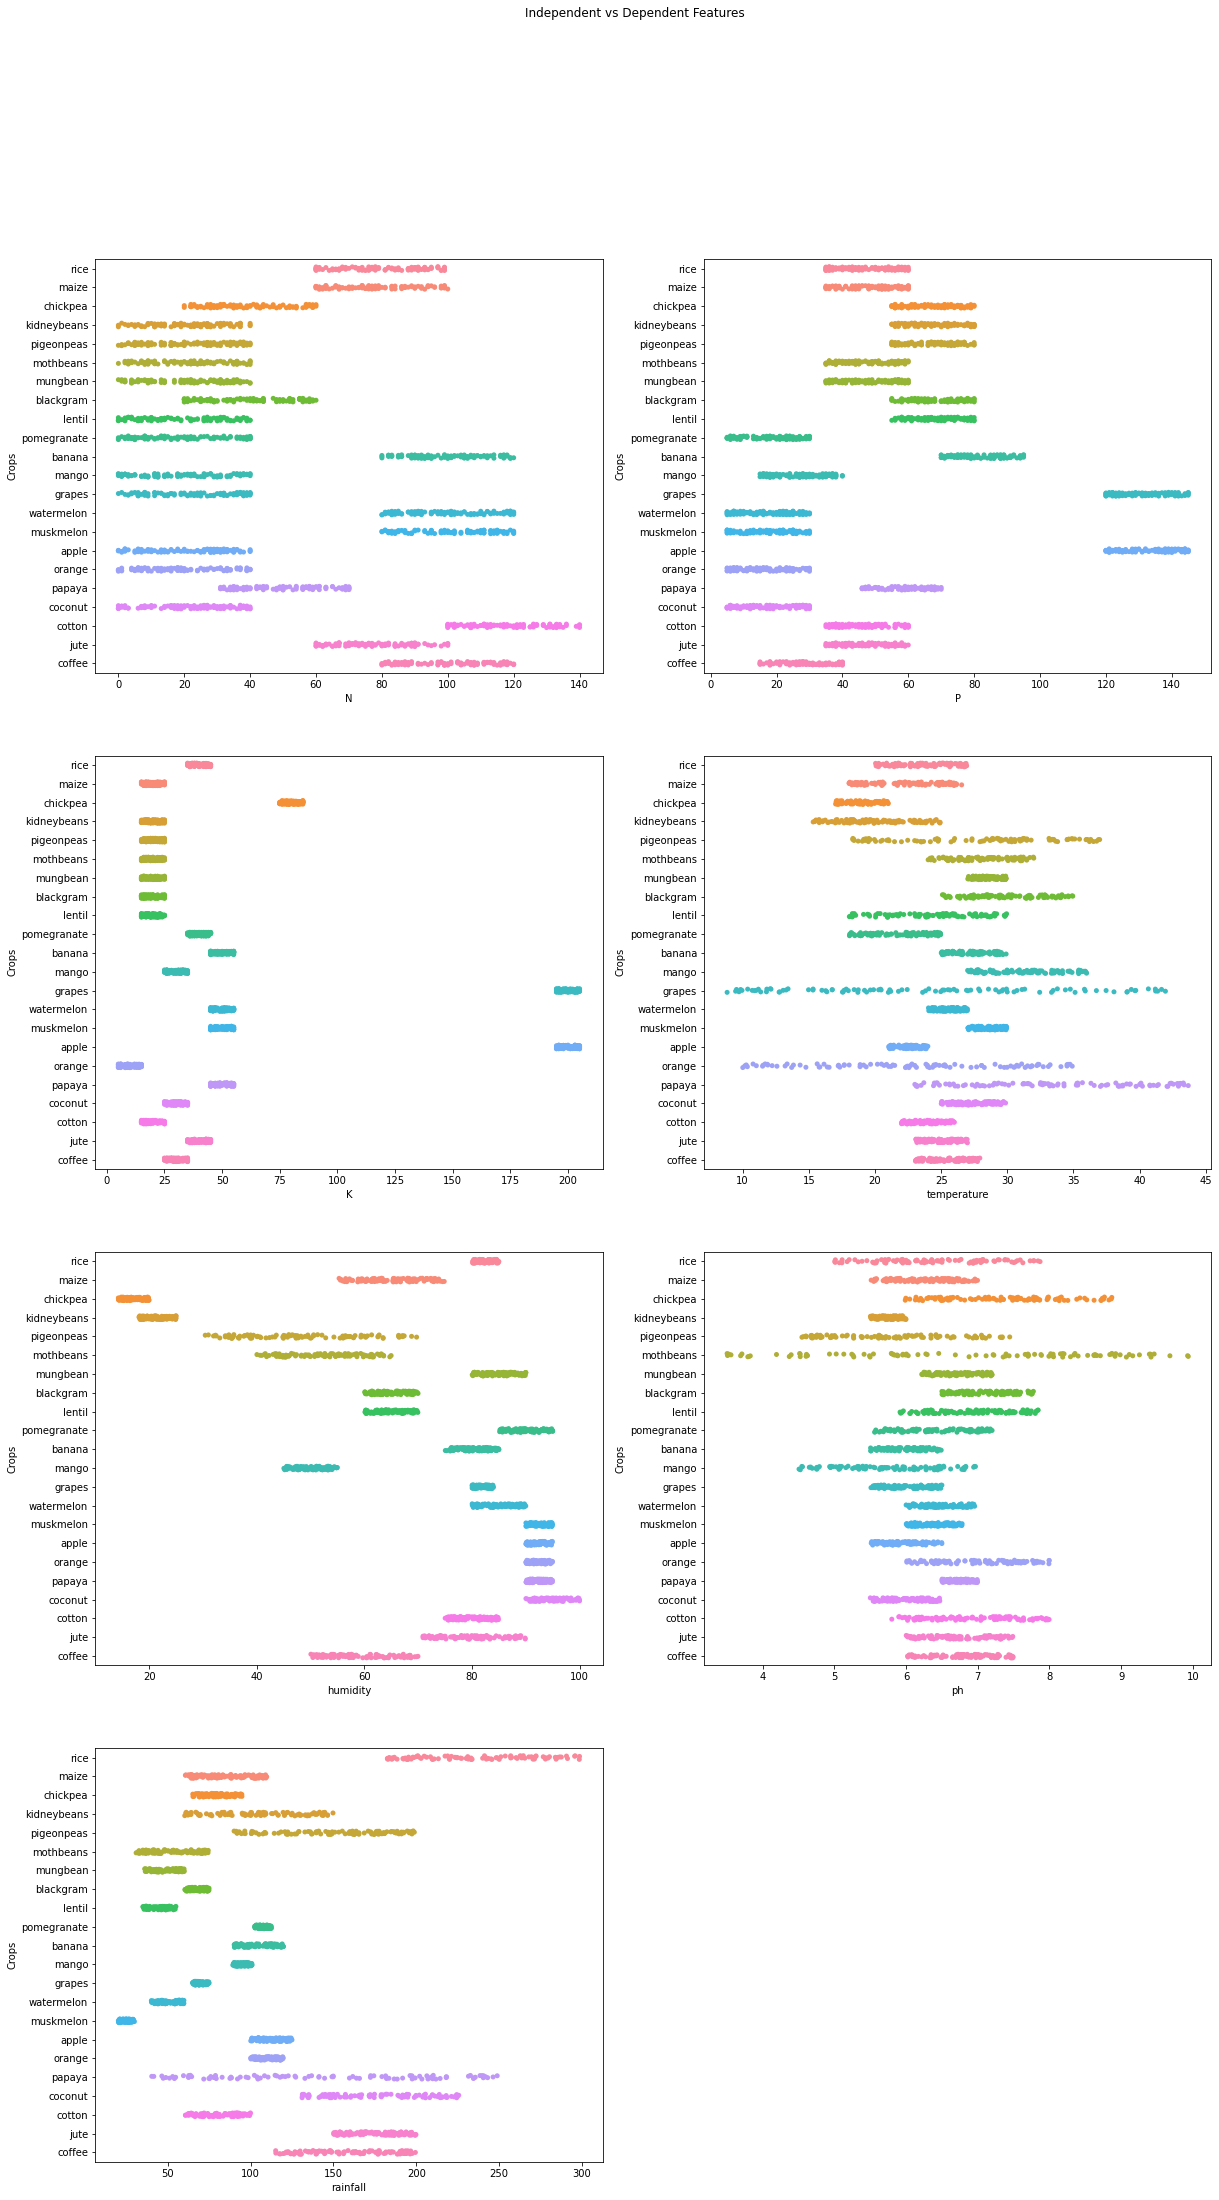

In [ ]:
plot_stripplot(data, data.columns[:-1])
plt.show()
plt.close()

# **Train Test split**

In [ ]:
features = data.drop(['label'], axis=1)
target = data['label']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.33,random_state = 2)
print(data.shape)
print(Xtrain.shape)
print(Xtest.shape)

(2200, 8)
(1474, 7)
(726, 7)


In [ ]:
acc = []
models = []



#**Logistic regression**

>90, train: 0.956, test: 0.944, cross_val: 0.954 
>100, train: 0.956, test: 0.944, cross_val: 0.954 
>110, train: 0.956, test: 0.944, cross_val: 0.954 
>120, train: 0.956, test: 0.944, cross_val: 0.954 
>130, train: 0.956, test: 0.944, cross_val: 0.954 
>140, train: 0.956, test: 0.944, cross_val: 0.954 
>150, train: 0.956, test: 0.944, cross_val: 0.954 
>160, train: 0.956, test: 0.944, cross_val: 0.954 
>170, train: 0.956, test: 0.944, cross_val: 0.954 
>180, train: 0.956, test: 0.944, cross_val: 0.954 
>190, train: 0.956, test: 0.944, cross_val: 0.954 
>200, train: 0.956, test: 0.944, cross_val: 0.954 
>210, train: 0.956, test: 0.944, cross_val: 0.954 
>220, train: 0.956, test: 0.944, cross_val: 0.954 
>230, train: 0.956, test: 0.944, cross_val: 0.954 
>240, train: 0.956, test: 0.944, cross_val: 0.954 
>250, train: 0.956, test: 0.944, cross_val: 0.954 
>260, train: 0.956, test: 0.944, cross_val: 0.954 
>270, train: 0.956, test: 0.944, cross_val: 0.954 
>280, train: 0.956, test: 0.944,

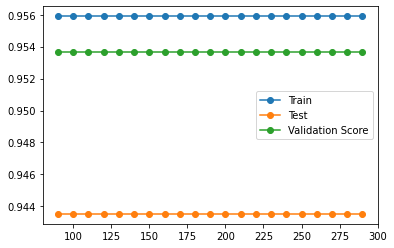

In [ ]:
train_scores, test_scores, validation_scores = list(), list(), list()
values = [i for i in range(90, 300, 10)]
for i in values:
  model = LogisticRegression(solver='liblinear', max_iter=i)
  model.fit(Xtrain, Ytrain)
  train_predict = model.predict(Xtrain)
  train_acc = metrics.accuracy_score(Ytrain, train_predict)
  train_scores.append(train_acc)
  test_predict = model.predict(Xtest)
  test_acc = metrics.accuracy_score(Ytest, test_predict)
  test_scores.append(test_acc)
  cross_val = cross_val_score(model, features, target, cv=10, scoring='accuracy')
  validation_scores.append(cross_val.mean())
  print('>%d, train: %.3f, test: %.3f, cross_val: %.3f ' % (i, train_acc, test_acc, cross_val.mean()))

plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.plot(values, validation_scores, '-o', label='Validation Score')
plt.legend()
plt.show()

 

In [ ]:
LogReg = LogisticRegression(solver='liblinear')

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)
predicted_values_train = LogReg.predict(Xtrain)

x = metrics.accuracy_score(Ytest, predicted_values)
x_train = metrics.accuracy_score(Ytrain, predicted_values_train)

acc.append(x)
models.append('Logistic Regression')

print("Logistic Regression's Accuracy(Testing) is: ", x*100)
print("Logistic Regression's Accuracy(Training) is: ", x_train*100)
results = cross_val_score(LogReg, features, target, cv=5, scoring='accuracy')
print('cross validation score',results.mean())

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy(Testing) is:  94.35261707988981
Logistic Regression's Accuracy(Training) is:  95.59023066485753
cross validation score 0.9531818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        33
      banana       1.00      1.00      1.00        33
   blackgram       0.81      0.94      0.87        32
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        34
      coffee       1.00      0.97      0.99        36
      cotton       0.89      0.97      0.93        35
      grapes       1.00      1.00      1.00        33
        jute       0.85      0.78      0.81        36
 kidneybeans       0.97      0.97      0.97        35
      lentil       0.89      0.94      0.91        34
       maize       0.97      0.89      0.93        35
       mango       1.00      1.00      1.00        34
   mothbeans       1.00      0.75      0.86        32
    mungbean       0

#**Decision Tree**

>1, train: 0.100, test: 0.066, cross_val: 0.091 
>2, train: 0.192, test: 0.154, cross_val: 0.182 
>3, train: 0.379, test: 0.321, cross_val: 0.358 
>4, train: 0.684, test: 0.664, cross_val: 0.689 
>5, train: 0.891, test: 0.872, cross_val: 0.914 
>6, train: 0.981, test: 0.970, cross_val: 0.974 
>7, train: 0.989, test: 0.972, cross_val: 0.977 
>8, train: 0.997, test: 0.975, cross_val: 0.981 
>9, train: 0.997, test: 0.975, cross_val: 0.983 
>10, train: 0.999, test: 0.979, cross_val: 0.982 
>11, train: 1.000, test: 0.982, cross_val: 0.983 
>12, train: 1.000, test: 0.978, cross_val: 0.982 
>13, train: 1.000, test: 0.981, cross_val: 0.981 
>14, train: 1.000, test: 0.982, cross_val: 0.981 
>15, train: 1.000, test: 0.981, cross_val: 0.981 
>16, train: 1.000, test: 0.982, cross_val: 0.982 
>17, train: 1.000, test: 0.982, cross_val: 0.981 
>18, train: 1.000, test: 0.979, cross_val: 0.982 
>19, train: 1.000, test: 0.977, cross_val: 0.983 
>20, train: 1.000, test: 0.981, cross_val: 0.981 


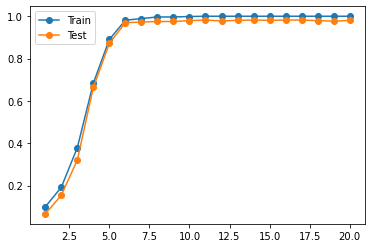

In [ ]:
train_scores, test_scores, validation_scores = list(), list(), list()
values = [i for i in range(1, 21)]
for i in values:
  model = DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
  model.fit(Xtrain, Ytrain)
  train_predict = model.predict(Xtrain)
  train_acc = metrics.accuracy_score(Ytrain, train_predict)
  train_scores.append(train_acc)
  test_predict = model.predict(Xtest)
  test_acc = metrics.accuracy_score(Ytest, test_predict)
  test_scores.append(test_acc)
  cross_val = cross_val_score(model, features, target, cv=5, scoring='accuracy')
  validation_scores.append(cross_val.mean())
  print('>%d, train: %.3f, test: %.3f, cross_val: %.3f ' % (i, train_acc, test_acc, cross_val.mean()))
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()



In [ ]:
DecisionTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
predicted_values_train = DecisionTree.predict(Xtrain)

x = metrics.accuracy_score(Ytest, predicted_values)
x_train = metrics.accuracy_score(Ytrain, predicted_values_train)
acc.append(x)
models.append('Decision Tree')

print("Decision Trees's Accuracy(Testing) is: ", x*100)
print("Decision Trees's Accuracy(Training) is: ", x_train*100)
results = cross_val_score(DecisionTree, features, target, cv = 5, scoring='accuracy')
print('cross validation score',results.mean())
print(metrics.classification_report(Ytest,predicted_values))

Decision Trees's Accuracy(Testing) is:  97.38292011019284
Decision Trees's Accuracy(Training) is:  98.10040705563094
cross validation score 0.9722727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        33
      banana       1.00      1.00      1.00        33
   blackgram       0.93      0.88      0.90        32
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        34
      coffee       1.00      1.00      1.00        36
      cotton       1.00      0.97      0.99        35
      grapes       1.00      1.00      1.00        33
        jute       0.85      0.94      0.89        36
 kidneybeans       1.00      0.97      0.99        35
      lentil       0.94      1.00      0.97        34
       maize       0.97      0.94      0.96        35
       mango       1.00      1.00      1.00        34
   mothbeans       0.88      0.91      0.89        32
    mungbean       1.00      1

## **SVM(Support vector machine)**

In [ ]:
svc = SVC(kernel = 'rbf', C = 0.3)
svc.fit(Xtrain,Ytrain)
 
predicted_values = svc.predict(Xtest)
predicted_values_train = svc.predict(Xtrain)
 
x = metrics.accuracy_score(Ytest, predicted_values)
x_train = metrics.accuracy_score(Ytrain, predicted_values_train)
acc.append(x)
models.append('SVM')
print("SVM's Accuracy(Testing) is: ", x*100)
print("SVM's Accuracy(Training) is: ", x_train*100)
results = cross_val_score(DecisionTree, features, target, cv=5, scoring='accuracy')
print("cross validation score", results.mean() )
print(classification_report(Ytest,predicted_values))

SVM's Accuracy(Testing) is:  97.2451790633609
SVM's Accuracy(Training) is:  96.6078697421981
cross validation score 0.9736363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        33
      banana       1.00      1.00      1.00        33
   blackgram       0.94      0.94      0.94        32
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      0.94      0.97        34
      coffee       1.00      1.00      1.00        36
      cotton       0.97      1.00      0.99        35
      grapes       1.00      1.00      1.00        33
        jute       0.86      1.00      0.92        36
 kidneybeans       0.92      0.97      0.94        35
      lentil       0.92      0.97      0.94        34
       maize       1.00      0.97      0.99        35
       mango       1.00      1.00      1.00        34
   mothbeans       0.97      0.94      0.95        32
    mungbean       0.97      1.00      0.99        36


#**Plotting accuracies**

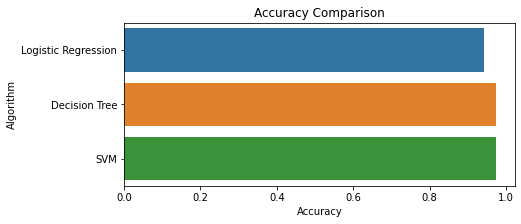

In [ ]:
plt.figure(figsize=[7,3])
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = models)

#**OUTPUT**

In [ ]:
data = np.array([[140, 40, 35, 25, 100, 7.5, 100]])
logreg_pred = LogReg.predict(data)
Dt_pred = DecisionTree.predict(data)
svc_pred = svc.predict(data)
print(logreg_pred, Dt_pred, svc_pred)

['cotton'] ['cotton'] ['cotton']


In [ ]:
data = np.array([[50, 40, 60, 27, 35, 5.0, 200]])
logreg_pred = LogReg.predict(data)
Dt_pred = DecisionTree.predict(data)
svc_pred = svc.predict(data)
print(logreg_pred, Dt_pred, svc_pred)

['mango'] ['rice'] ['jute']


In [ ]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
logreg_pred = LogReg.predict(data)
Dt_pred = DecisionTree.predict(data)
svc_pred = svc.predict(data)
print(logreg_pred, Dt_pred, svc_pred)

['coffee'] ['coffee'] ['coffee']


In [ ]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
logreg_pred = LogReg.predict(data)
Dt_pred = DecisionTree.predict(data)
svc_pred = svc.predict(data)
print(logreg_pred, Dt_pred, svc_pred)

['jute'] ['jute'] ['jute']


In [ ]:
data = np.array([[20, 130, 200, 20, 80, 6.1, 63]])
logreg_pred = LogReg.predict(data)
Dt_pred = DecisionTree.predict(data)
svc_pred = svc.predict(data)
print(logreg_pred, Dt_pred, svc_pred)

['grapes'] ['grapes'] ['grapes']
